## NFL Model-less Median Benchmark
For a good baseline to compare our models to, we can create a median baseline. Intuitively this make some sense. If we wanted to make a conservative prediction with no context you would just guess what happens most of the time which would be the median. (Numerous high yardage outliers makes the mean skewed)

## Metric Report: 
**With Smoothing**  
MAE: 2.8475  
CRSP: 0.01431  
**Without Smoothing**  
MAE: 3.6724  
CRSP: 0.01845

## Median Prediction - With Sigmodial Smoothing
CRPS metric is very sensitive to how you smooth the function. A sigmodial smoothing is a great way to minimize the CRSP. 

**We are going to make a constant median prediction with sigmoidal post-processing. Inspired by [this Notebook](https://www.kaggle.com/hukuda222/nfl-simple-evluation-trick) by @hukuda222.**

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
# from kaggle.competitions import nflrush

In [2]:
train_df = pd.read_csv('train.csv', low_memory=False)

In [3]:
MEDIAN_YARDS = train_df["Yards"].median()
print(f"The median value of train target is {MEDIAN_YARDS} yards.")

The median value of train target is 3.0 yards.


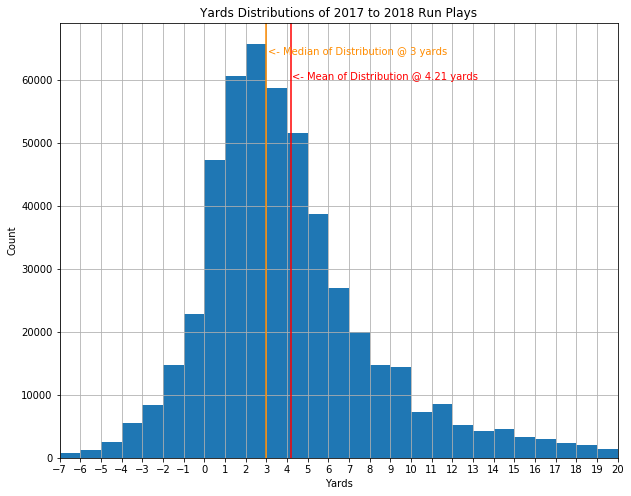

In [4]:
plt.figure(figsize = (10,8))
x=train_df['Yards']
train_df['Yards'].hist(bins=np.arange(min(x), max(x)+1, 1.0).tolist())
plt.title('Yards Distributions of 2017 to 2018 Run Plays')
plt.xlabel("Yards")
plt.ylabel("Count")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlim((-7,20))
plt.axvline(x=3, color = 'darkorange')
plt.text(3.1, 64000, '<- Median of Distribution @ 3 yards', color='darkorange')  
plt.axvline(x=train_df['Yards'].mean(), color = 'red')
plt.text(4.25, 60000, '<- Mean of Distribution @ 4.21 yards', color='red') 
# plt.savefig(f'Yard_distribution.png')
# plt.grid()
plt.show()

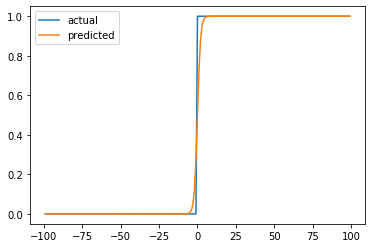

In [5]:
def sigmoid(x):
    return 1. / (1 + np.exp(-x))

plt.plot(range(-99, 100), [1 if i >= 0 else 0 for i in range(-99, 100)], label="actual")
plt.plot(range(-99, 100), [sigmoid(i) for i in range(-99, 100)], label="predicted")
plt.legend();

In [6]:
y_train = train_df.loc[range(0, 509762, 22), "Yards"]

In [7]:
y_pred, y_true = np.zeros((len(y_train), 199)), np.zeros((len(y_train), 199))

for i in range(len(y_train)):
    # all predictions are the same :)
    y_pred[i, :] = sigmoid(0.42 * (np.arange(-99, 100) - MEDIAN_YARDS))

for i, p in enumerate(y_train):
    for j in range(-99, 100):
        if j >= p:
            y_true[i, j + 99] = 1

print("Validation score:", np.sum(np.power(y_pred - y_true, 2)) / (199 * len(y_train)))

Validation score: 0.014309048420246445


In [8]:
Absolute_Error = np.power(y_pred-y_true,2).sum(axis=1)
MAE = Absolute_Error.mean()
print('MAE: ', MAE)

MAE:  2.8475006356290438


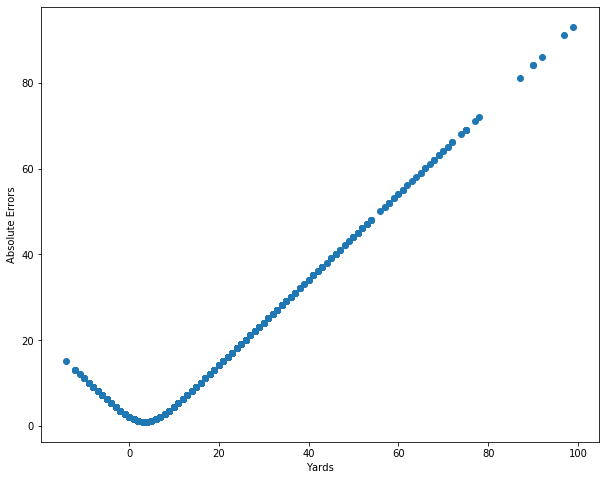

In [9]:
plt.figure(figsize = (10,8))
plt.scatter(y_train, Absolute_Error)
# plt.plot(y_test, y_test, color='orange')
plt.xlabel("Yards")
plt.ylabel("Absolute Errors")
plt.show()

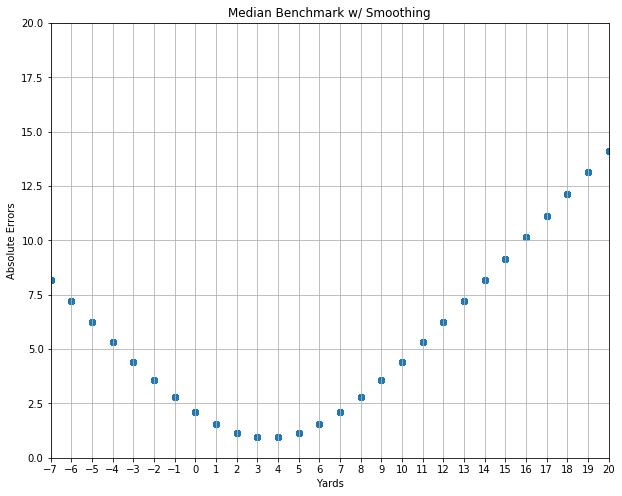

In [10]:
x=train_df['Yards']
plt.figure(figsize = (10,8))
plt.scatter(y_train, Absolute_Error)
# plt.plot(y_test, y_test, color='orange')
plt.title('Median Benchmark w/ Smoothing')
plt.xlabel("Yards")
plt.ylabel("Absolute Errors")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlim((-7,20))
plt.ylim((0,20))
plt.grid()

## Median Prediction - No Smoothing
For a simpler metric, we can do the straight median prediction with no smoothing function. This will be easier for the average person to understand but the metric will have a significantly higher error.

In [11]:
y_train = train_df.loc[range(0, 509762, 22), "Yards"]

In [12]:
y_pred, y_true = np.zeros((len(y_train), 199)), np.zeros((len(y_train), 199))

for i in range(len(y_train)):
    for j in range(-99, 100):
        if j >= MEDIAN_YARDS:
            y_pred[i, j + 99] = 1

for i, p in enumerate(y_train):
    for j in range(-99, 100):
        if j >= p:
            y_true[i, j + 99] = 1

print("Validation score CRPS:", np.sum(np.power(y_pred - y_true, 2)) / (199 * len(y_train)))

Validation score CRPS: 0.018454665975859184


In [13]:
Absolute_Error = np.power(y_pred-y_true,2).sum(axis=1)
MAE = Absolute_Error.mean()
print('MAE: ', MAE)

MAE:  3.6724785291959776


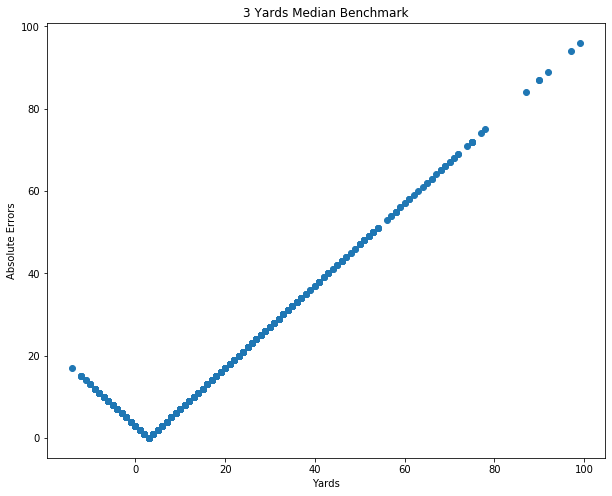

In [14]:
plt.figure(figsize = (10,8))
plt.scatter(y_train, Absolute_Error)
# plt.plot(y_test, y_test, color='orange')
plt.title('3 Yards Median Benchmark')
plt.xlabel("Yards")
plt.ylabel("Absolute Errors")
# plt.savefig(f'Median_AE.png')
plt.show()


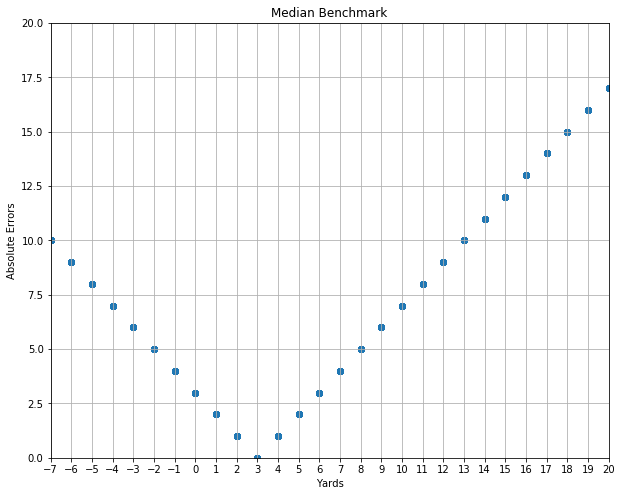

In [15]:
x=train_df['Yards']
plt.figure(figsize = (10,8))
plt.scatter(y_train, Absolute_Error)
# plt.plot(y_test, y_test, color='orange')
plt.title('Median Benchmark')
plt.xlabel("Yards")
plt.ylabel("Absolute Errors")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlim((-7,20))
plt.ylim((0,20))
plt.grid()
# plt.savefig(f'Median_zoom_AE.png')
plt.show()